# Алиев Азнаур, Б01-909 

## ОДУ XI.9.3. a)

## Построить алгоритм метода пристрелки для вычисления решения следующей нелинейной задачи:

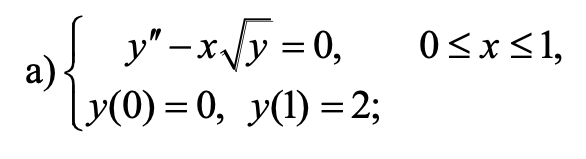

## Метод стрельбы: параметризуем начальное значение производной

## Имеем краевую задачу:
$$
\left\lbrace
\begin{matrix}
% y'' + px\cdot \cos{y} = 0, \:\: x \in \left( 0, 1\right] \\
% y(0) = 0\\
y'' - x\sqrt{y} = 0 \\
y'(0) = \alpha \\
y(0) = 0 \\
y(1) = 2
\end{matrix}
\right.
$$

## Разностная схема

$$
\frac{y_{k+1}\space - 2y_k + y_{k-1}}{h^2} - {x_k}\sqrt{y_k} = 0 \\
$$
$$
y_{k+1} = 2y_k - y_{k-1}\space + {x_k}\cdot h^2 \cdot \sqrt{y_k} \\
$$
$$
Найдем\space y_{1}\spaceиз\spaceразложения\spaceпо\spaceТейлору\spaceв\space x=0:
$$
$$
y_{1} = y(0) + y'(0) \cdot h + y''(0) \cdot \frac{h^2}{2} + y'''(0)\cdot\frac{h^3}{6}
$$
$$
\\
$$
$$
y(0) = 0,\space y'(0) = \alpha,\space y''(0) = 0,\space y'''(0) = 0 \\
$$
$$
y_{1} = \alpha h
$$


In [144]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

In [145]:
eps = 1e-10
h = 1e-4
a = 0
b = 1
y_1 = 2

In [146]:
def grid(h, alpha):
    y = [0, h * alpha ]
    ypprev = 0
    yprev = y[1]
    for x in np.arange(a + h, b, h):
        ycur = 2*yprev - ypprev + x*h**2*np.sqrt(yprev)
        y.append(ycur)
        ypprev = yprev
        yprev = ycur

    return y

In [147]:
def newton(h, eps, alpha_0):
    y = grid(h, alpha_0)
    Fprev = y_1 - y[-1]
    aprev = alpha_0
    alpha =  alpha_0 + 1 
    i = 0
    while True:
        i += 1
        y = grid(h, alpha)
        F = y_1 - y[-1]
        dF = (F - Fprev) / (alpha - aprev)
        aprev = alpha
        Fprev = F
        diff = F / dF
        alpha -= diff
        if abs(diff) < eps:
            break
       

    print(f'num_of_iterations: {i}')
    return y, alpha

In [148]:
def draw(h, eps, alpha):
    y, alpha_fin = newton(h, eps, alpha)
    x = np.arange(a, b + h, h)
    plt.figure(figsize=(10, 8), dpi=80)
    plt.plot(x, [2*x_ for x_ in x] , color='green', label='2x')
    plt.plot(x, y, color='blue', label='shoot_approach')
    plt.xlabel("$x$", fontsize=20)
    plt.ylabel("$y$", fontsize=20)
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    return y, alpha_fin

num_of_iterations: 5


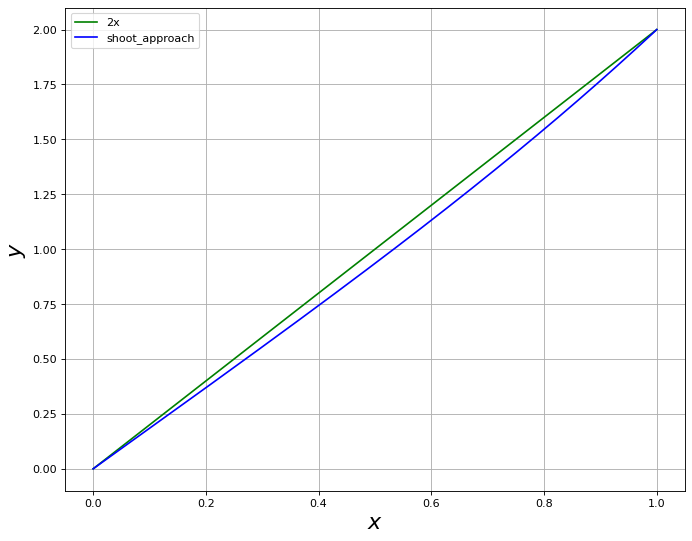

In [149]:
y, alpha_fin = draw(h, eps, alpha=0.0)

## Результаты  метода

In [150]:
print(f'y(2): {y[-1]}, alpha : {alpha_fin:.3f}')

y(2): 1.99999999999652, alpha : 1.843
